**Project: Headphone data from DarazBD Analysis** <br>
**Name:  [Md. Zobayer Ibna Kabir](https://github.com/ZobayerAkib)**

#**Drive Mount**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Important Libraries Loading**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


#**Data Load**

In [5]:
DATAPATH="/content/drive/MyDrive/data/Data Analyst/darazBD_headphone.csv"
df=pd.read_csv(DATAPATH)
df.head()


,Title,Company Name,Type,Colour,orginal price,dicounted price,Discount,Rating,Location
0,JBL TUNE 110 In-Ear Earphone,JBL,In-Ear,White,"৳ 1,050",৳ 899,-14%,-186.0,Bangladesh
1,QKZ CK1 HD HiFi Earphone High Sensitivity fone...,QKZ,Earphone,Red,৳ 600,৳ 332,-45%,-256.0,Free Shipping
2,KZ HD9 Earphones HiFi Sport Earbuds Copper Ear...,KZ,Wireless,Black,৳ 900,৳ 265,-71%,-424.0,Free Shipping
3,Lenovo HE05 Bluetooth Wireless Headphones,Lenovo,In-Ear,baby pink,"৳ 1,300",৳ 510,-61%,-2487.0,Free Shipping
4,Orignal Creative High Bass Audio Earphone with...,Orignal,Earphoone,Active black,৳ 299,৳ 135,-55%,-144.0,Bangladesh


#EDA

In [6]:
#checking the shape
df.shape

(3080, 9)

In [42]:
#check Null values
df.isnull().sum()

Title                 0
Company Name          0
Type                  0
Colour                0
orginal price       306
dicounted price       0
Discount            306
Rating             2048
Location              0
dtype: int64

In [8]:
#cheking the datatype of columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            3080 non-null   object 
 1   Company Name     3080 non-null   object 
 2   Type             3080 non-null   object 
 3   Colour           3080 non-null   object 
 4   orginal price    2774 non-null   object 
 5   dicounted price  3080 non-null   object 
 6   Discount         2774 non-null   object 
 7   Rating           1032 non-null   float64
 8   Location         3080 non-null   object 
dtypes: float64(1), object(8)
memory usage: 216.7+ KB


In [10]:
#checking all the columns name
df.columns

Index(['Title', 'Company Name', 'Type', 'Colour ', 'orginal price',
       'dicounted price', 'Discount', 'Rating', 'Location'],
      dtype='object')

In [13]:
df.Title.value_counts()


Title
QKZ AK6 HiFi Sports Running In-Ear Headphones Music Headphones With Microphone and Wheat Subwoofer                                 68
Orignal Creative High Bass Audio Earphone with Pouch EP-530 - Black                                                                47
BT1 Bluetooth Earphones- Wireless Headphones Mini Handsfree Bluetooth Headset With Mic Earbuds For All Smart Phone                 22
buy 1 get 1 Vivo In Ear Earphone Best Sound quality with free one - White                                                          21
Lenovo HF140 Wired Earphones 3.5mm Super Bass Stereo Metal In-ear Earphone with Mic Noise Cancelling Music Headsets                21
                                                                                                                                   ..
NIA X9 Wireless BT Headphones Foldable Over-ear Earphone Music Headset 3.5mm AUX IN TF Card Music Playback FM with Microphone       1
Uiisii Hm12 Gaming Headset On-Ear Deep Bass Good Treble 

In [14]:
df.Title.value_counts().sum()

3080

**Top 10 headset based on dataset**

In [15]:
df.Title.value_counts()[0:10]

Title
QKZ AK6 HiFi Sports Running In-Ear Headphones Music Headphones With Microphone and Wheat Subwoofer                                                                          68
Orignal Creative High Bass Audio Earphone with Pouch EP-530 - Black                                                                                                         47
BT1 Bluetooth Earphones- Wireless Headphones Mini Handsfree Bluetooth Headset With Mic Earbuds For All Smart Phone                                                          22
buy 1 get 1 Vivo In Ear Earphone Best Sound quality with free one - White                                                                                                   21
Lenovo HF140 Wired Earphones 3.5mm Super Bass Stereo Metal In-ear Earphone with Mic Noise Cancelling Music Headsets                                                         21
KZ HD9 Earphones HiFi Sport Earbuds Copper Earhook ear Headphones In Ear Earphone For Running With Microphone game Head

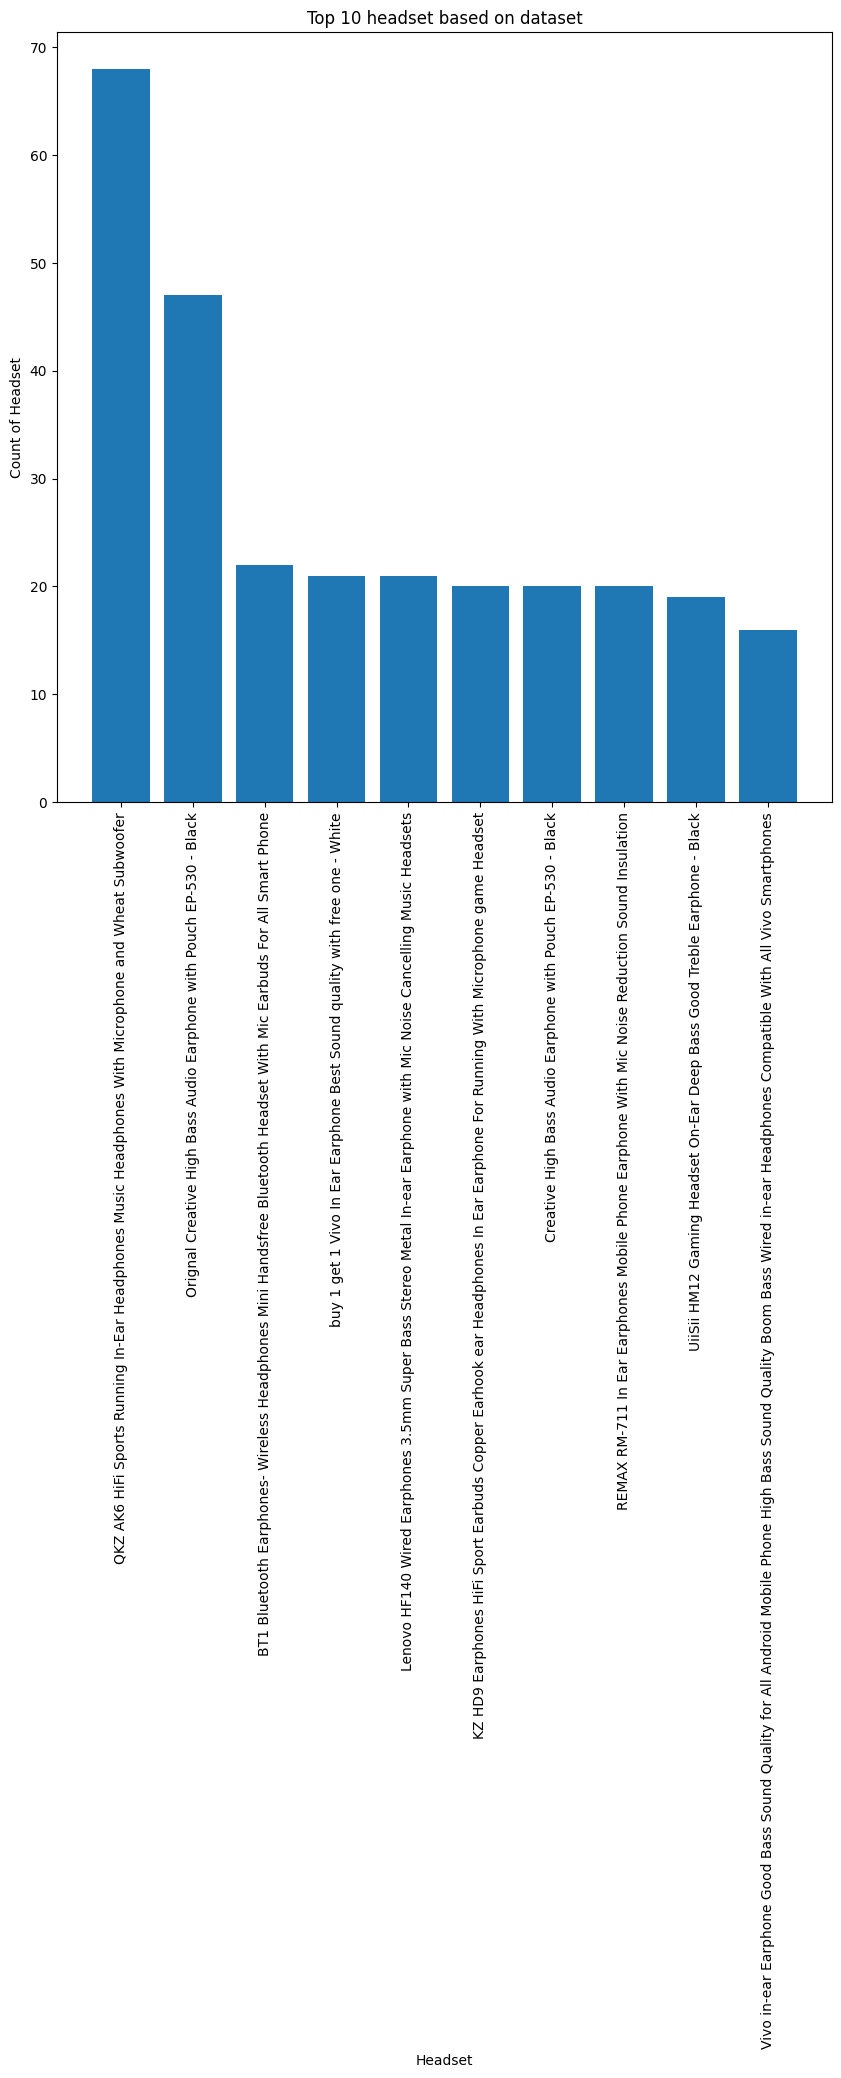

In [28]:
x=df.Title.value_counts()[0:10]
y=x.index
plt.figure(figsize=(10,10))
plt.bar(y,x)
plt.xticks(rotation=90)
plt.title("Top 10 headset based on dataset")
plt.xlabel("Headset")
plt.ylabel("Count of Headset")
plt.show()


**Top 10 company based on dataset**

In [24]:
#checking all company
df['Company Name'].value_counts()

Company Name
UiiSii    229
Lenovo    222
QKZ       161
Vivo      125
KZ         92
         ... 
Tuker       1
Boom        1
J-abra      1
6.5mm       1
kin         1
Name: count, Length: 459, dtype: int64

In [23]:
df['Company Name'].value_counts()[0:10]

Company Name
UiiSii     229
Lenovo     222
QKZ        161
Vivo       125
KZ          92
Oppo        65
Orignal     57
Remax       54
SONY        49
Uiisii      48
Name: count, dtype: int64

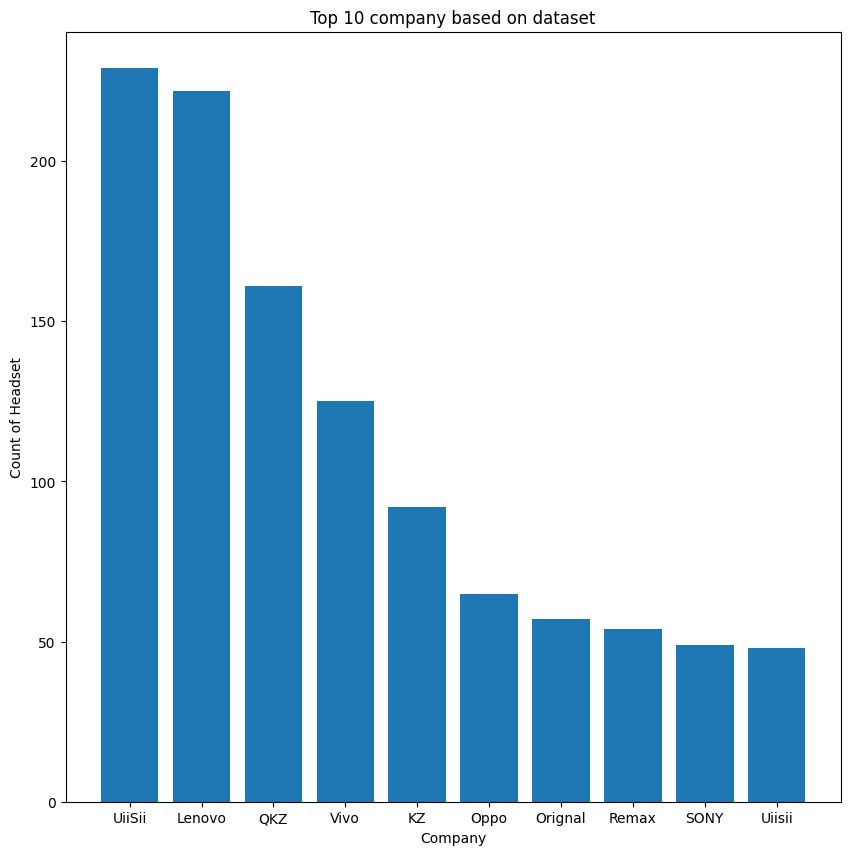

In [27]:
plt.figure(figsize=(10,10))
plt.bar(df['Company Name'].value_counts()[0:10].index,df['Company Name'].value_counts()[0:10])
plt.title("Top 10 company based on dataset")
plt.xlabel("Company")
plt.ylabel("Count of Headset")
plt.show()

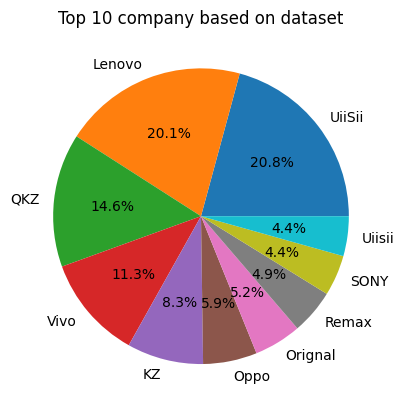

In [30]:
plt.pie(df['Company Name'].value_counts()[0:10],labels=df['Company Name'].value_counts()[0:10].index,autopct='%1.1f%%')
plt.title("Top 10 company based on dataset")

plt.show()

**Types of headset based on Dataset**

In [31]:
df.Type.value_counts()

Type
In-Ear       1369
Earphone      685
Wireless      684
Earphoone     342
Name: count, dtype: int64

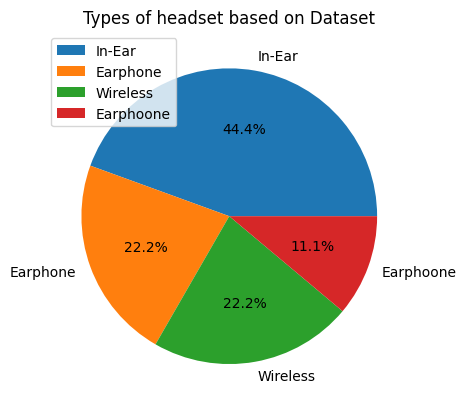

In [33]:
plt.pie(df.Type.value_counts(),labels=df.Type.value_counts().index,autopct='%1.1f%%')
plt.title("Types of headset based on Dataset")
plt.legend()
plt.show()

**Top colours based of dataset**

In [44]:
df['Colour '].value_counts()

Colour 
White           616
Red             616
Black           616
baby pink       616
Active black    616
Name: count, dtype: int64

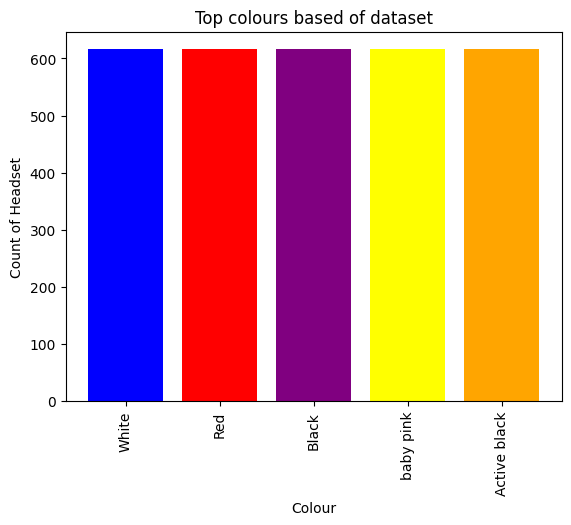

In [48]:
plt.bar(df['Colour '].value_counts().index,df['Colour '].value_counts(),color=['blue','red','purple','yellow','orange'])
plt.xticks(rotation=90)
plt.title("Top colours based of dataset")
plt.xlabel("Colour")
plt.ylabel("Count of Headset")
plt.show()

**Orginal Price Analysis**

count     2774.000000
mean       931.974766
std       1225.520753
min         60.000000
25%        300.000000
50%        550.000000
75%       1000.000000
max      18999.000000
Name: orginal price, dtype: float64


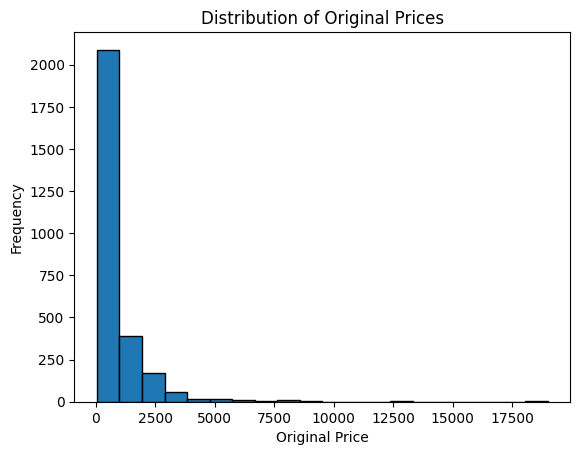

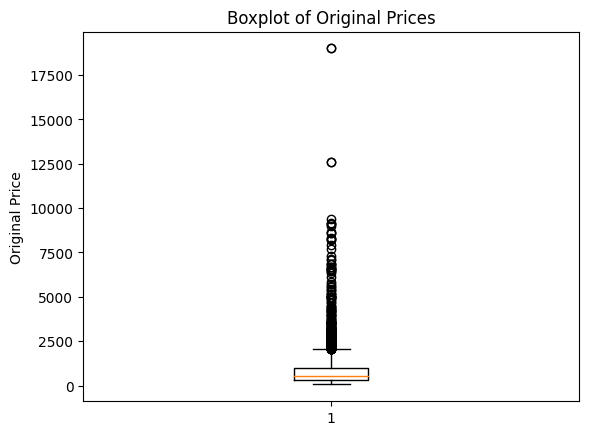

In [54]:
# Clean the 'orginal price' column
df['orginal price'] = df['orginal price'].replace('[^\d.]', '', regex=True)  # Remove non-numeric characters

# Convert to numeric, setting errors to NaN
df['orginal price'] = pd.to_numeric(df['orginal price'], errors='coerce')

# Drop rows with NaN values in 'orginal price'
df = df.dropna(subset=['orginal price'])


# Descriptive statistics
print(df['orginal price'].describe())

# Histogram of original prices
plt.hist(df['orginal price'], bins=20, edgecolor='black')
plt.title('Distribution of Original Prices')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of original prices
plt.boxplot(df['orginal price'])
plt.title('Boxplot of Original Prices')
plt.ylabel('Original Price')
plt.show()


**Discounted Price analysis**

count    2774.000000
mean      556.966474
std       760.118550
min        35.000000
25%       160.000000
50%       310.000000
75%       651.500000
max      9899.000000
Name: dicounted price, dtype: float64


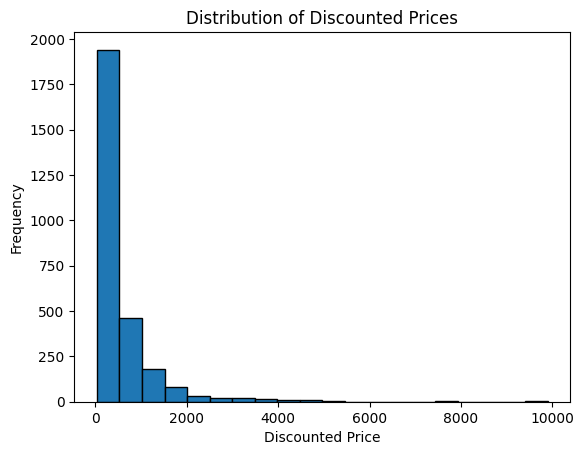

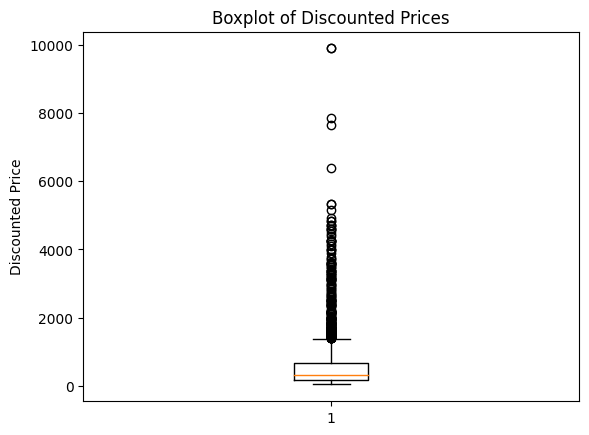

{'mean_discounted_price': 556.9664744051911, 'median_discounted_price': 310.0, 'std_dev_discounted_price': 760.1185498581686, 'num_products': 437}


In [59]:
# Clean the 'discounted_price' column
df['dicounted price'] = df['dicounted price'].replace('[^\d.]', '', regex=True)  # Remove non-numeric characters
df['dicounted price'] = pd.to_numeric(df['dicounted price'], errors='coerce')  # Convert to numeric, set errors to NaN


df = df.dropna(subset=['dicounted price'])


print(df['dicounted price'].describe())

# Histogram of discounted prices
plt.hist(df['dicounted price'], bins=20, edgecolor='black')
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of discounted prices
plt.boxplot(df['dicounted price'])
plt.title('Boxplot of Discounted Prices')
plt.ylabel('Discounted Price')
plt.show()

# Compare discounted prices with original prices (if available)
if 'original_price' in df.columns:
    df['discount_percentage'] = (df['original price'] - df['dicounted price']) / df['original price'] * 100
    print(df[['Title', 'original price', 'dicounted price', 'discount_percentage']])

# Average price by category (if applicable)
if 'category' in df.columns:
    avg_price_by_category = df.groupby('category')['dicounted price'].mean()
    print(avg_price_by_category)



# Summary
summary = {
    'mean_discounted_price': df['dicounted price'].mean(),
    'median_discounted_price': df['dicounted price'].median(),
    'std_dev_discounted_price': df['dicounted price'].std(),
    'num_products': df['Company Name'].nunique(),
}
print(summary)


**Rating analysis**

count     941.000000
mean      -20.628055
std        96.676615
min     -2487.000000
25%       -10.000000
50%        -3.000000
75%        -1.000000
max        -1.000000
Name: Rating, dtype: float64


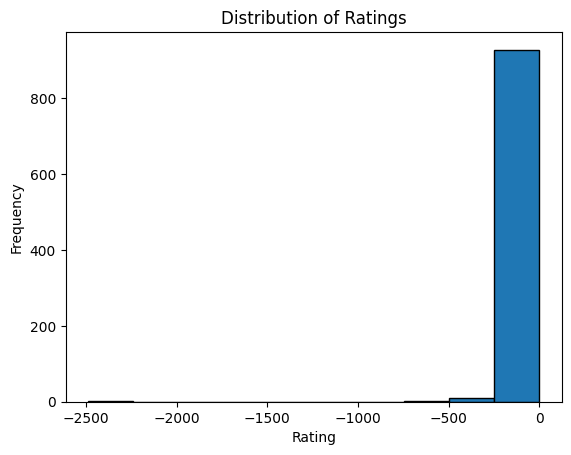

{'mean_rating': -20.628055260361318, 'median_rating': -3.0, 'std_dev_rating': 96.67661502615869}


In [62]:
# Basic Descriptive Statistics for Rating
print(df['Rating'].describe())

# Histogram of Ratings
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Summary Statistics for Ratings
rating_summary = {
    'mean_rating': df['Rating'].mean(),
    'median_rating': df['Rating'].median(),
    'std_dev_rating': df['Rating'].std(),
}
print(rating_summary)


**Loaction Analysis**

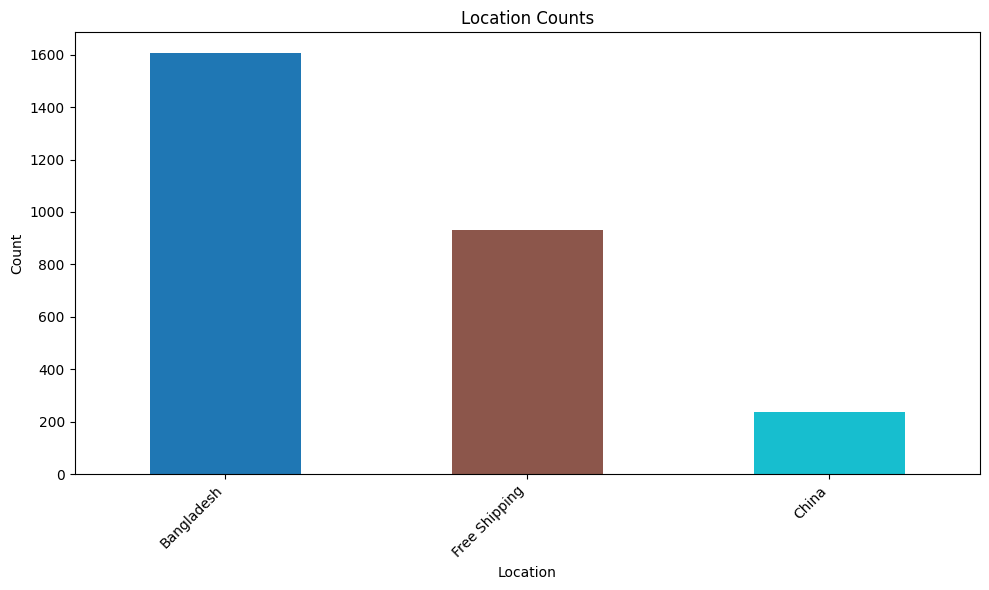

In [67]:
location_counts = df['Location'].value_counts()


colors = plt.cm.tab10(np.linspace(0, 1, len(location_counts)))


plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color=colors)
plt.title('Location Counts')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


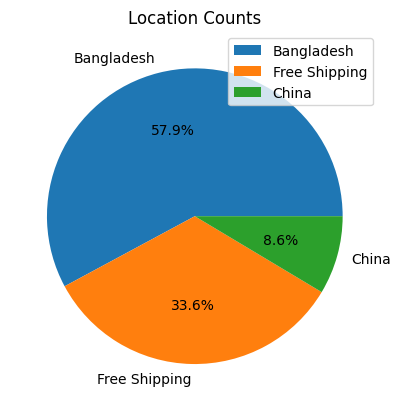

In [69]:
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%')
plt.title('Location Counts')
plt.legend()
plt.show()